### Student Information
Name: 張原嘉

Student ID: 106062530

GitHub ID: shiajih

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# 1.Take Home Exercises Part

In [134]:
### Begin Assignment Here!
### import some necessary stuffs
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import plotly.graph_objs as go
import math
import nltk
#something important
nltk.download('punkt')
# necessary for when working with external scripts
%reload_ext autoreload
%autoreload 2

# categories which exercises may use
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X.iloc[::10, 0:2][0:10]
X.loc[::10, 'text'][0:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

### Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [135]:
### Using query function for finding category equals "0" (alt.atheism)
X.query('category == [0]')

,text,category,category_name
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
17,Organization: Penn State University From: <JSN...,0,alt.atheism
19,Subject: Re: Don't more innocents die without ...,0,alt.atheism
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism
36,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
37,From: bcash@crchh410.NoSubdomain.NoDomain (Bri...,0,alt.atheism
38,From: darice@yoyo.cc.monash.edu.au (Fred Rice)...,0,alt.atheism
41,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
45,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,0,alt.atheism


### Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
$Hint$ : why .isnull() didn't work?

In [136]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [137]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [138]:
# Answer here

## The isnull() return true if  an object is null or if an array is given which of the element is null.(By pandas documentation)
## In this case, A,B are the null elements. C,D are the string objects, so they have something indeed.
## E is the python special singleton None, specifics this element is null.
## F contains string or character which content is empty(Not a null).

In [139]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))


text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

### Exercise 6 (take home)
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [140]:
X[10:30][["text", "category_name"]]
print(X.category_name.value_counts())


soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


In [141]:
X_sample = X.sample(n=1000, replace=True)
X_sample

,text,category,category_name
372,From: young@is.s.u-tokyo.ac.jp (YOUNG Shio Hon...,1,comp.graphics
416,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
554,From: JEK@cu.nih.gov Subject: Chanting of the ...,3,soc.religion.christian
1645,From: cgschot@cs.ruu.nl (Gerco Schot) Subject:...,1,comp.graphics
1995,From: rcj2@cbnewsd.cb.att.com (ray.c.jender) S...,2,sci.med
2108,From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...,0,alt.atheism
975,From: scornd7@technet.sg (Tang Chang Thai) Sub...,1,comp.graphics
1179,From: backon@vms.huji.ac.il Subject: Re: point...,2,sci.med
464,From: madhaus@netcom.com (Maddi Hausmann) Subj...,0,alt.atheism
2023,From: cliff@watson.ibm.com (cliff) Subject: Re...,1,comp.graphics


In [142]:
X[10:30][["text", "category_name"]]

,text,category_name
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,soc.religion.christian
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,comp.graphics
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,alt.atheism
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",sci.med
17,Organization: Penn State University From: <JSN...,alt.atheism
18,From: tom_milligan@rainbow.mentorg.com Subject...,soc.religion.christian
19,Subject: Re: Don't more innocents die without ...,alt.atheism


In [143]:
# Answer here

## I think there are no changes after function called. 
## Because we only sample something from X, assign them to the X_sample
## It may not change anything in X.

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


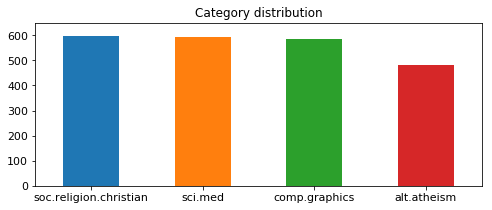

In [146]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

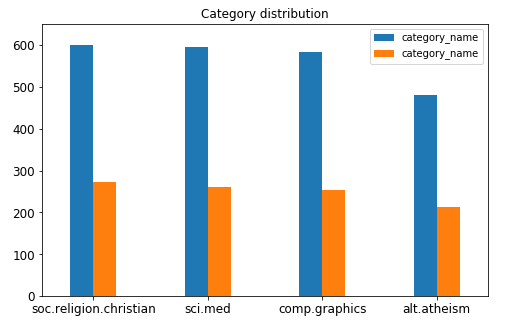


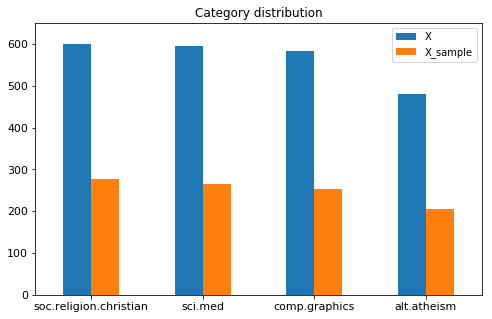

In [147]:
# Answer here

show_order = ['soc.religion.christian','sci.med','comp.graphics','alt.atheism']

df = pd.DataFrame(data={'X':X['category_name'].value_counts(),
                   'X_sample':X_sample['category_name'].value_counts()}, index = show_order)

ax = df.plot(kind= 'bar',
             title = 'Category distribution',
             ylim = [0, 650],
             rot = 0,
             fontsize = 11,
             figsize = (8,5))

In [149]:

upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

TypeError: 'numpy.float64' object is not callable

In [150]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]
X[0:4]
list(X[0:1]['unigrams'])
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

### Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [151]:
# Answer here

X_counts = count_vect.fit_transform(X.text)

## Find the position of 1, and store in the index_is_1
index_is_1 = np.where(X_counts[4].toarray()[0] == 1)[0] 

## Show the second one (The exercise asks)
count_vect.get_feature_names()[index_is_1[1]]



'01'

### Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization


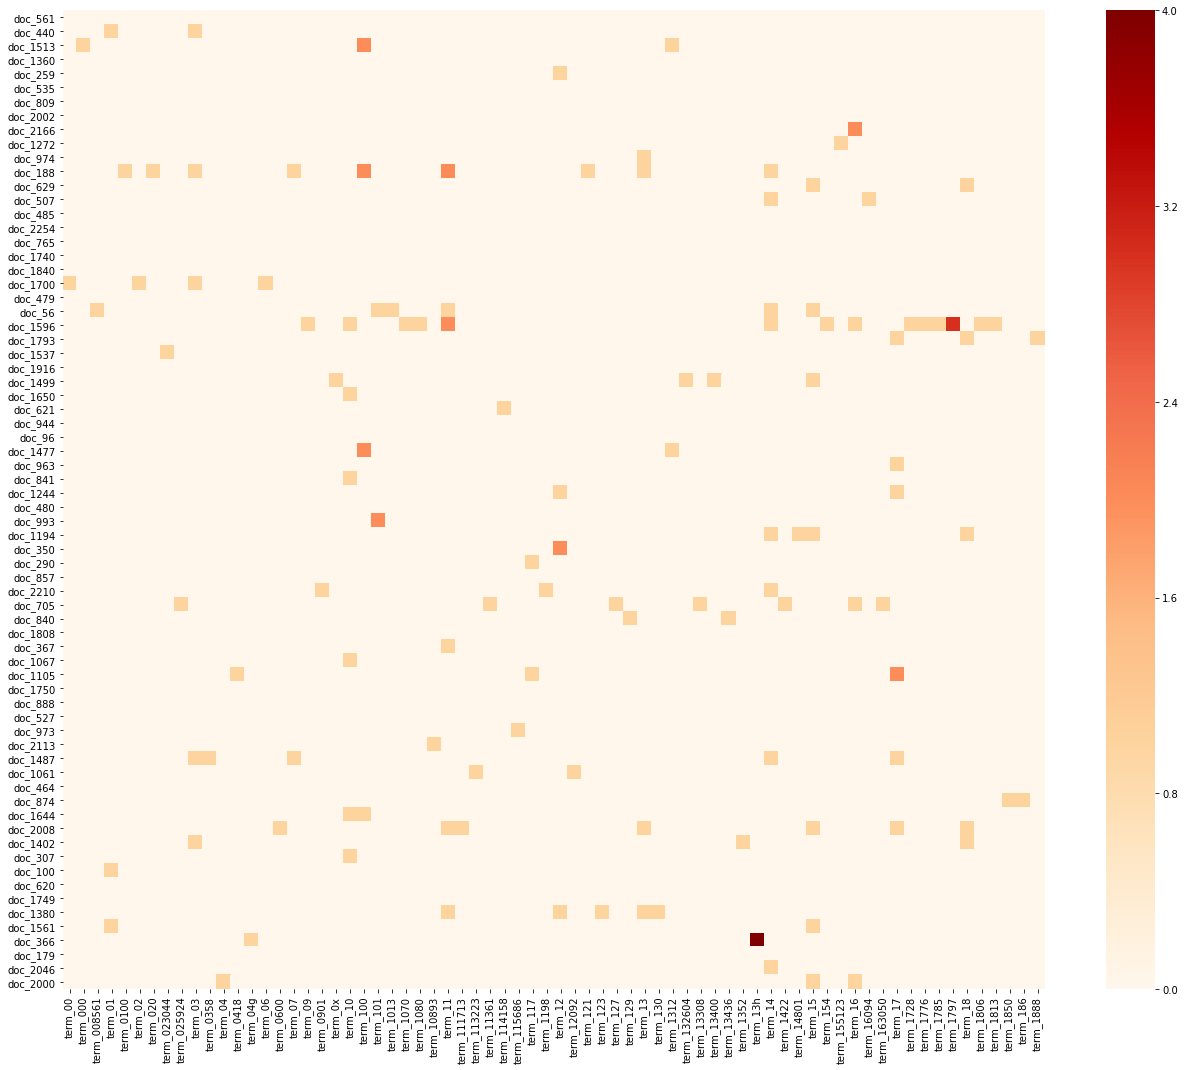

In [152]:
# Answer here

## Step 1.
## I sample 70 samples from the X dataframe to X_sample, and set random_state to 42 to make sure that every run this cell will get
## the same samples.

## Step 2.
## Construct the fundamental variables for plotting the heatmap later.

## Step 3.
## Show the final heatmap.
import seaborn as sns

sample_counts = 70;
X_Sample = X.sample(n = sample_counts, random_state = 42)

X_Sample_counts = count_vect.fit_transform(X_Sample.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:sample_counts]]
plot_y = ["doc_"+ str(i) for i in list(X_Sample.index)[0:sample_counts]]
plot_z = X_Sample_counts[0:sample_counts, 0:sample_counts].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(22, 18))
ax = sns.heatmap(df_todraw,
                 cmap="OrRd",
                 vmin=0, annot=False)

### Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

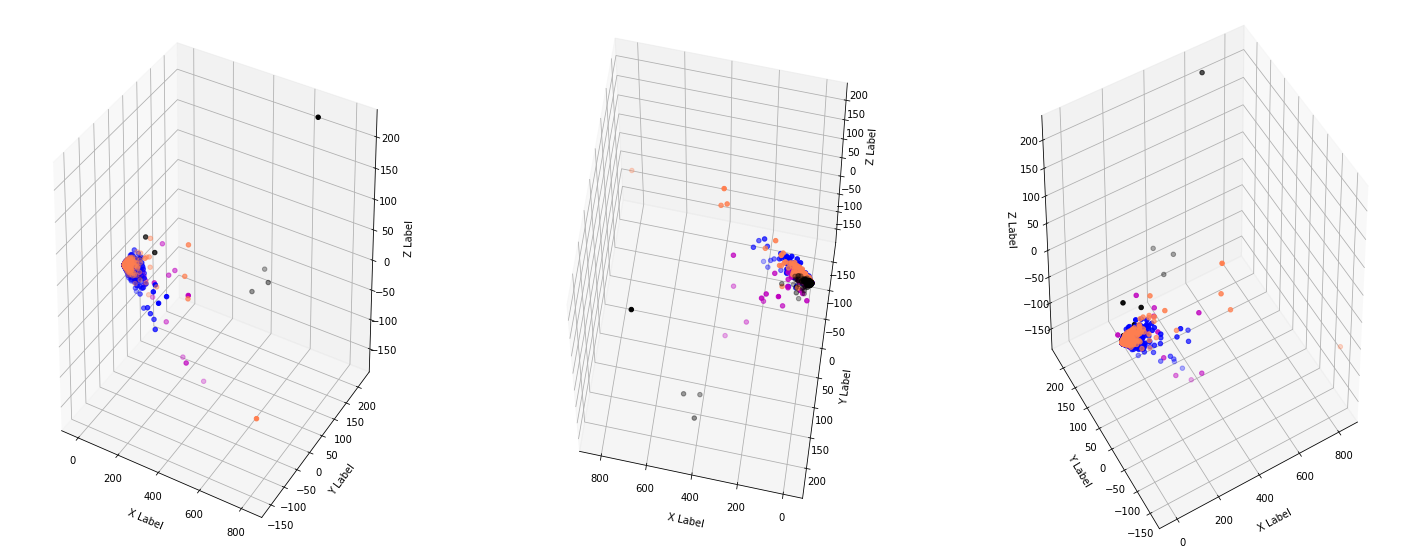

In [153]:
# Answer here

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced_to_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# Plot three figures
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(131, projection = '3d')
ax1 = fig.add_subplot(132, projection = '3d')
ax2 = fig.add_subplot(133, projection = '3d')

for c, category in zip(col, categories):
    xs = X_reduced_to_3[X['category_name'] == category].T[0]
    ys = X_reduced_to_3[X['category_name'] == category].T[1]
    zs = X_reduced_to_3[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker = 'o')
    ax1.scatter(xs, ys, zs, c = c, marker = 'o')
    ax2.scatter(xs, ys, zs, c = c, marker = 'o')


ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

# Change the view point
ax1.view_init(60, 100)
ax2.view_init(40, 240)
plt.show()

## The 3d figure shows more angles which causes the data start to separate. 

In [154]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[0:10,j].toarray()))

In [155]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


In [156]:
term_frequencies[0]


134

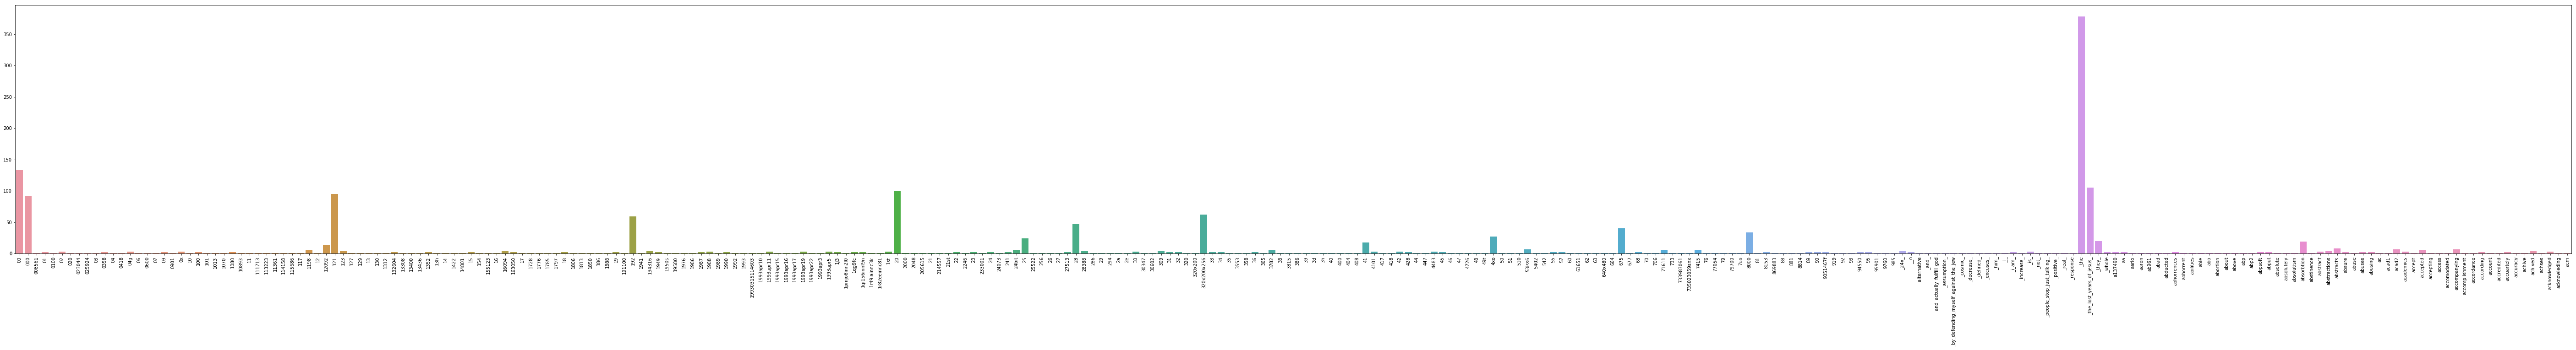

In [157]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's notebook for code on how to generate the interactive version of the plot above.

In [158]:
# Answer here
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#plotly.tools.set_credentials_file(username='k134563', api_key='1jkzR1YreRZNRKXAyhJR')

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:300]]

# Counts
y = term_frequencies[:300]

need_print = [go.Bar(
            x = x,
            y = y   
            )]

py.offline.iplot(need_print, filename='Exercise 13')

### Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


In [159]:
count_vect.get_feature_names()[0:10]
term_frequencies[0:10]

array([134,  92,   1,   2,   1,   3,   1,   1,   1,   1], dtype=int64)

In [160]:
# Answer here

## I think we can just show the term frequency(counts) which large than 20.

## !! If I don't set 0:2000 for terms and counts, it will show the ValueError "arrays must all be same length in Pandas" !!
## !! But I could run this cell in the first time.

dataframe = pd.DataFrame({'terms': count_vect.get_feature_names()[0:3000], 'counts': term_frequencies[0:3000]})

## Sample 1,000 from main dataframe.
sample_dataframe = dataframe.sample(n = 1000, random_state = 42)

## Find the term frequency(counts) which large than 20.
final_dataframe = sample_dataframe[(sample_dataframe['counts'] > 20)][:]

x2 = final_dataframe['terms'].values.tolist()

y2 = final_dataframe['counts'].values.tolist()

need_print = [go.Bar(
            x = x2,
            y = y2   
            )]

py.offline.iplot(need_print, filename='Exercise 14')


### Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

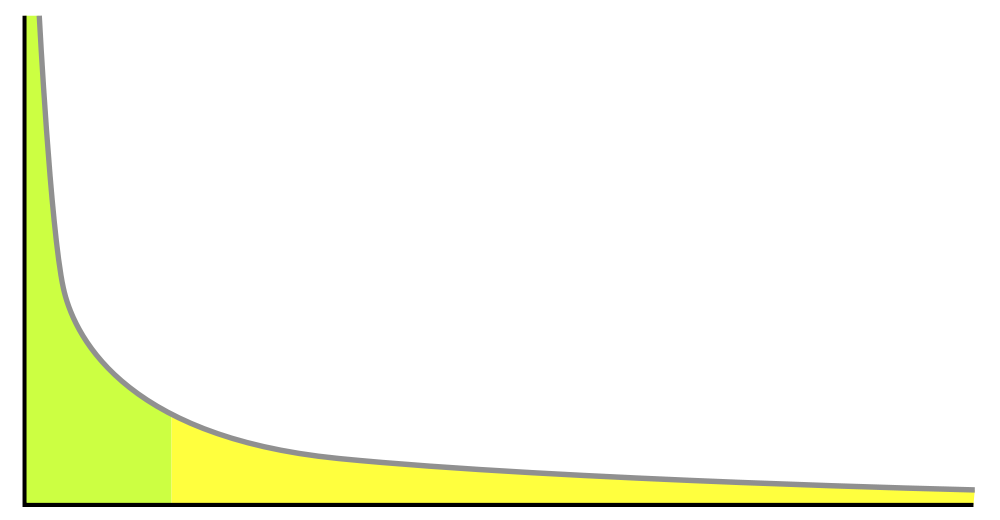


In [161]:
# Answer here

## I only show 0~1000 elements from sorted dataframe, if i don't do that, it will show
## "The draw time for this plot will be slow for clients without much RAM."

sorted = dataframe.sort_values(by = 'counts', ascending = False)

sorted_sample = sorted[0:1000]

x = ["term_" + str(i) for i in sorted_sample['terms']]

y = sorted_sample['counts']


need_print = [go.Bar(
            x = x,
            y = y   
            )]

py.offline.iplot(need_print, filename='Exercise 15')

In [162]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]


,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [163]:
# Answer here

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

## I think it works properly.

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


This is the end of 1.Take Home Exercises Part



# 2.New dataset Part

In [164]:
# Prepare needed data

az_df = pd.read_csv('sentiment-labelled-sentences/amazon_cells_labelled.txt', sep = "\t", header = None)
im_df = pd.read_csv('sentiment-labelled-sentences/imdb_labelled.txt', sep = "\t", header = None)
yp_df = pd.read_csv('sentiment-labelled-sentences/yelp_labelled.txt', sep = "\t", header = None)

# Add column

column = ['sentence', 'score']

az_df.columns = column
im_df.columns = column
yp_df.columns = column

In [165]:
# Check column & length

print(az_df[0:10])
print(len(yp_df))

                                            sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
5  I have to jiggle the plug to get it to line up...      0
6  If you have several dozen or several hundred c...      0
7        If you are Razr owner...you must have this!      1
8                Needless to say, I wasted my money.      0
9                   What a waste of money and time!.      0
1000


In [166]:
# Print out the yp_df text data(sentence and score) for the first three samples in the dataset.
for t in az_df.sentence[:3]:
    print(t)
for t in az_df.score[:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
0
1
1


## Convert text data to Pandas dataframe

In [167]:
new_dataset_df = pd.DataFrame()
filelist = ['sentiment-labelled-sentences/amazon_cells_labelled.txt', 'sentiment-labelled-sentences/imdb_labelled.txt', 'sentiment-labelled-sentences/yelp_labelled.txt']

for ijk in filelist:
    frame = pd.read_csv(ijk, sep = "\t", header = None)
    new_dataset_df = new_dataset_df.append(frame, ignore_index = True)

new_dataset_df.columns = ['sentence', 'score']
new_dataset_df['rating'] = new_dataset_df.score.apply(lambda s: 'positive' if s == 1 else 'negative')

# Show dataframe
new_dataset_df

,sentence,score,rating
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
5,I have to jiggle the plug to get it to line up...,0,negative
6,If you have several dozen or several hundred c...,0,negative
7,If you are Razr owner...you must have this!,1,positive
8,"Needless to say, I wasted my money.",0,negative
9,What a waste of money and time!.,0,negative


In [168]:
# Query first 10 elements
new_dataset_df[0:10]

,sentence,score,rating
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
5,I have to jiggle the plug to get it to line up...,0,negative
6,If you have several dozen or several hundred c...,0,negative
7,If you are Razr owner...you must have this!,1,positive
8,"Needless to say, I wasted my money.",0,negative
9,What a waste of money and time!.,0,negative


In [169]:
new_dataset_df[-10:]

,sentence,score,rating
2738,The refried beans that came with my meal were ...,0,negative
2739,Spend your money and time some place else.,0,negative
2740,A lady at the table next to us found a live gr...,0,negative
2741,the presentation of the food was awful.,0,negative
2742,I can't tell you how disappointed I was.,0,negative
2743,I think food should have flavor and texture an...,0,negative
2744,Appetite instantly gone.,0,negative
2745,Overall I was not impressed and would not go b...,0,negative
2746,"The whole experience was underwhelming, and I ...",0,negative
2747,"Then, as if I hadn't wasted enough of my life ...",0,negative


In [170]:
# standard query (Cannot simultaneously select rows and columns)
new_dataset_df[::10][0:10]

,sentence,score,rating
0,So there is no way for me to plug it in here i...,0,negative
10,And the sound quality is great.,1,positive
20,I went on Motorola's website and followed all ...,0,negative
30,"This is a simple little phone to use, but the ...",0,negative
40,"It has a great camera thats 2MP, and the pics ...",1,positive
50,Not loud enough and doesn't turn on like it sh...,0,negative
60,Essentially you can forget Microsoft's tech su...,0,negative
70,Mic Doesn't work.,0,negative
80,I wear it everyday and it holds up very well.,1,positive
90,For a product that costs as much as this one d...,0,negative


## Missing value

In [171]:
new_dataset_df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
rating      (The amoung of missing records is: , 0)
dtype: object

In [172]:
new_dataset_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

## Dummy Series

In [173]:
dummy_series = pd.Series(["This is a dummy record", np.nan], index = ["sentence", "score"])

In [174]:
dummy_series


sentence    This is a dummy record
score                          NaN
dtype: object

In [175]:
result_with_series = new_dataset_df.append(dummy_series, ignore_index=True)

In [176]:
len(result_with_series)


2749

In [177]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))
# We added dummy record to our dataframe indeed

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
rating      (The amoung of missing records is: , 1)
dtype: object

## Remove the records with missing values

In [178]:
result_with_series.dropna(inplace = True)

In [179]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
rating      (The amoung of missing records is: , 0)
dtype: object

In [180]:
len(result_with_series)
# All clear!

2748

## Dealing with Duplicate Data

In [181]:
sum(new_dataset_df.duplicated())

# We have duplicate data indeed.

17

In [182]:
new_dataset_df.drop_duplicates(keep=False, inplace=True)

In [183]:
len(new_dataset_df)
# Success to drop duplicate data.

2714

## Sampling Data

In [184]:
X_new_dataset_df_sample = new_dataset_df.sample(n=1000)

In [185]:
len(X_sample)


1000

In [186]:
X_new_dataset_df_sample[0:20]


,sentence,score,rating
306,Has been working great.,1,positive
85,The headsets are easy to use and everyone love...,1,positive
2132,WILL NEVER EVER GO BACK AND HAVE TOLD MANY PEO...,0,negative
973,Lousy product.,0,negative
821,"That being said, for a phone, the camera is ve...",1,positive
1346,"It's just adorable seeing Mickey playing ""Turk...",1,positive
610,It doesn't work in Europe or Asia.,0,negative
688,Too bad you have to pay up to $$$ a month for ...,0,negative
483,You won't regret it!,1,positive
289,"This item is great, installed it, let it charg...",1,positive


In [187]:
column

['sentence', 'score']

## Check the distribution figure

In [188]:
print(new_dataset_df.score.value_counts())

upperbound = max(new_dataset_df.score.value_counts()) + 100

new_dataset_df.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, upperbound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# 1 represent positive
# 0 represent negative

1    1366
0    1348
Name: score, dtype: int64


TypeError: 'numpy.float64' object is not callable

## We can also randomly sample two datasets, and compare them.

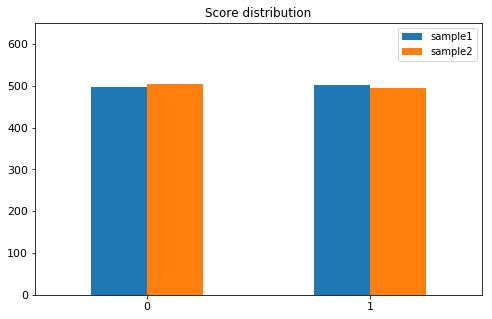

In [189]:
df_sample1 = new_dataset_df.sample(n = 1000)
df_sample2 = new_dataset_df.sample(n = 1000)

df3 = pd.DataFrame(data={'sample1':df_sample1['score'].value_counts(),
                   'sample2':df_sample2['score'].value_counts()})

ax = df3.plot(kind= 'bar',
             title = 'Score distribution',
             ylim = [0, 650],
             rot = 0,
             fontsize = 11,
             figsize = (8,5))

# 1 represent positive
# 0 represent negative

## Feature Creation

In [190]:
# takes a like a minute or two to process
new_dataset_df['unigrams'] = new_dataset_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [191]:
new_dataset_df[0:4]["unigrams"]


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [192]:
new_dataset_df[0:4]


,sentence,score,rating,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."


In [193]:
list(X[0:1]['unigrams'])


[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

## Feature subset selection

In [194]:
count_vect_n = CountVectorizer()
X_counts_n = count_vect_n.fit_transform(new_dataset_df.sentence)

In [195]:
X_counts_n

<2714x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 30149 stored elements in Compressed Sparse Row format>

In [196]:
# Term-document matrix
X_counts_n.shape

(2714, 5153)

In [197]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect_n.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [198]:
plot_x = ["term_"+str(i) for i in count_vect_n.get_feature_names()[300:350]]
plot_x

['term_ask',
 'term_asked',
 'term_asking',
 'term_asleep',
 'term_aspect',
 'term_aspects',
 'term_ass',
 'term_assante',
 'term_assaulted',
 'term_assistant',
 'term_assumed',
 'term_assure',
 'term_astonishingly',
 'term_astronaut',
 'term_at',
 'term_ate',
 'term_atleast',
 'term_atmosphere',
 'term_atrocious',
 'term_atrocity',
 'term_att',
 'term_attached',
 'term_attack',
 'term_attacked',
 'term_attempt',
 'term_attempted',
 'term_attempting',
 'term_attempts',
 'term_attention',
 'term_attentive',
 'term_attitudes',
 'term_attractive',
 'term_audience',
 'term_audio',
 'term_auju',
 'term_aurvåg',
 'term_austen',
 'term_austere',
 'term_authentic',
 'term_author',
 'term_auto',
 'term_available',
 'term_average',
 'term_aversion',
 'term_avocado',
 'term_avoid',
 'term_avoided',
 'term_avoiding',
 'term_award',
 'term_awarded']

## Draw heat map

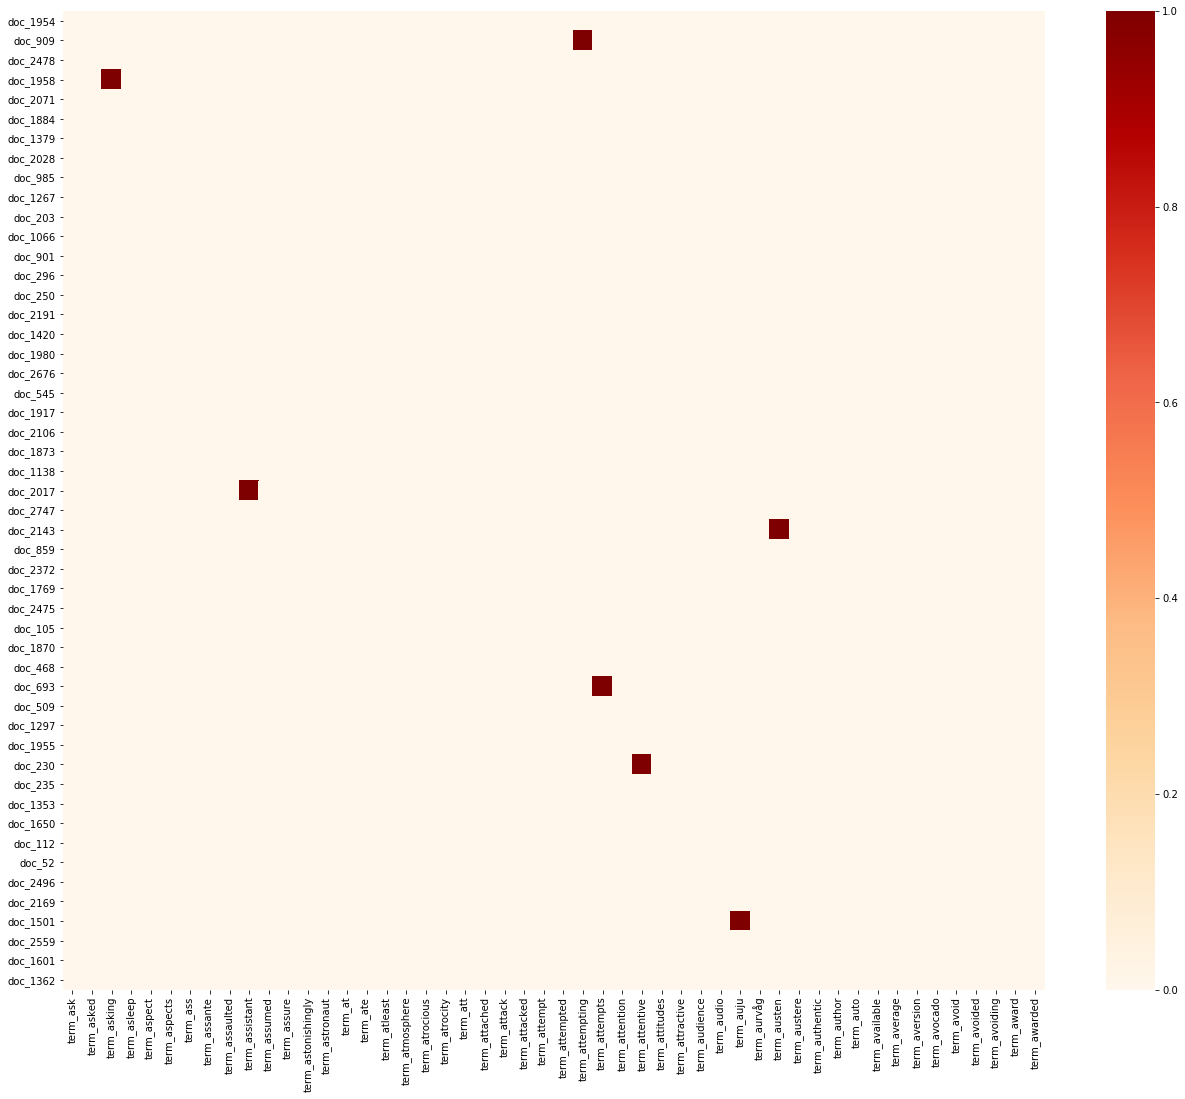

In [199]:
sample_counts = 500;


X_Sample_n = new_dataset_df.sample(n = sample_counts, random_state = 42)

X_counts_n = count_vect_n.fit_transform(X_Sample_n.sentence)

# For later use
X_counts_normal = count_vect_n.fit_transform(new_dataset_df.sentence)
# For later use

plot_x = ["term_" + str(i) for i in count_vect_n.get_feature_names()[300:350]]
plot_y = ["doc_" + str(i) for i in list(X_Sample_n.index)[300:350]]
plot_z = X_counts_n[300:350, 300:350].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(22, 18))
ax = sns.heatmap(df_todraw,
                 cmap="OrRd",
                 vmin=0, annot=False)

## Dimensionality Reduction - 2D

In [200]:
newdata_reduced_2d = PCA(n_components = 2).fit_transform(X_counts_normal.toarray())
newdata_reduced_2d.shape

(2714, 2)

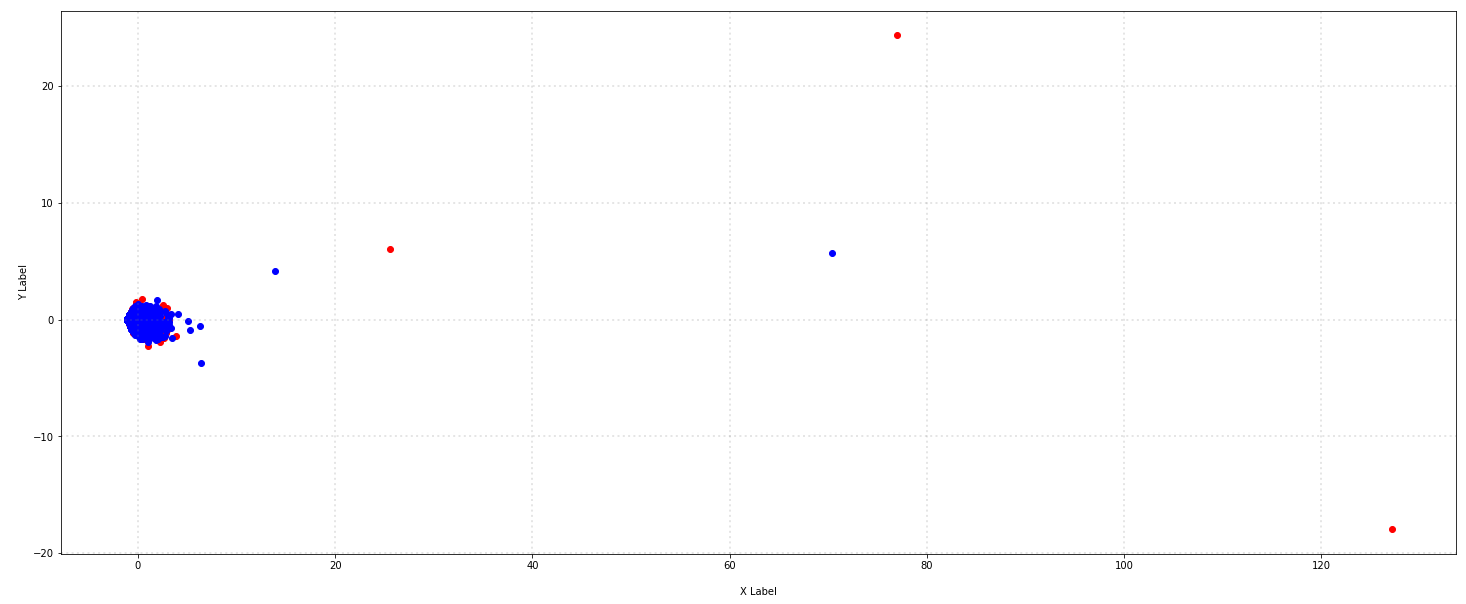

In [201]:
col = ['red', 'blue']

# !!! This must use int type, not string type !!!
scores = [0, 1]
# !!! This must use int type, not string type !!!

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score_n in zip(col, scores):
    xs1 = newdata_reduced_2d[new_dataset_df['score'] == score_n].T[0]
    ys1 = newdata_reduced_2d[new_dataset_df['score'] == score_n].T[1]
   
    ax.scatter(xs1, ys1, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## Dimensionality Reduction - 3D

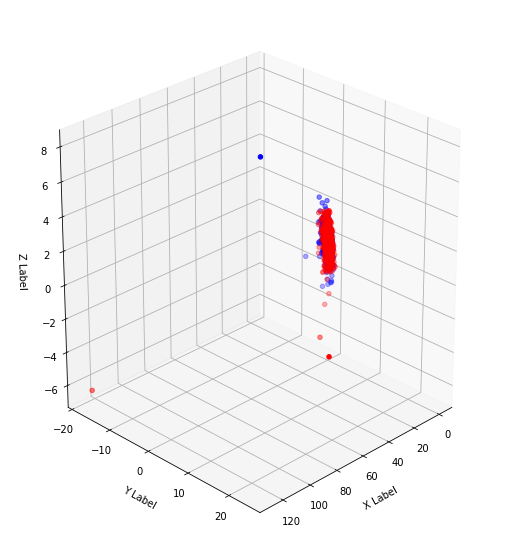

In [202]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# !!! This must use int type, not string type !!!
scores = [0, 1]
# !!! This must use int type, not string type !!!

col = ['red', 'blue']

newdata_reduced_3d = PCA(n_components = 3).fit_transform(X_counts_normal.toarray())

fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection = '3d')

for c, score_n in zip(col, scores):
    xs1 = newdata_reduced_3d[new_dataset_df['score'] == score_n].T[0]
    ys1 = newdata_reduced_3d[new_dataset_df['score'] == score_n].T[1]
    zs1 = newdata_reduced_3d[new_dataset_df['score'] == score_n].T[2]
    ax.scatter(xs1, ys1, zs1, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(25,45)
plt.show()

## Atrribute Transformation / Aggregation

In [203]:
term_frequencies = []
for j in range(0,X_counts_normal.shape[1]):
    term_frequencies.append(sum(X_counts_normal[:,j].toarray()))

In [204]:
X_counts_normal[0].toarray()


array([[0, 0, 0, ..., 0, 0, 0]])

In [205]:
term_frequencies_n = np.asarray(X_counts_normal.sum(axis=0))[0]


In [206]:
len(term_frequencies_n)


5153

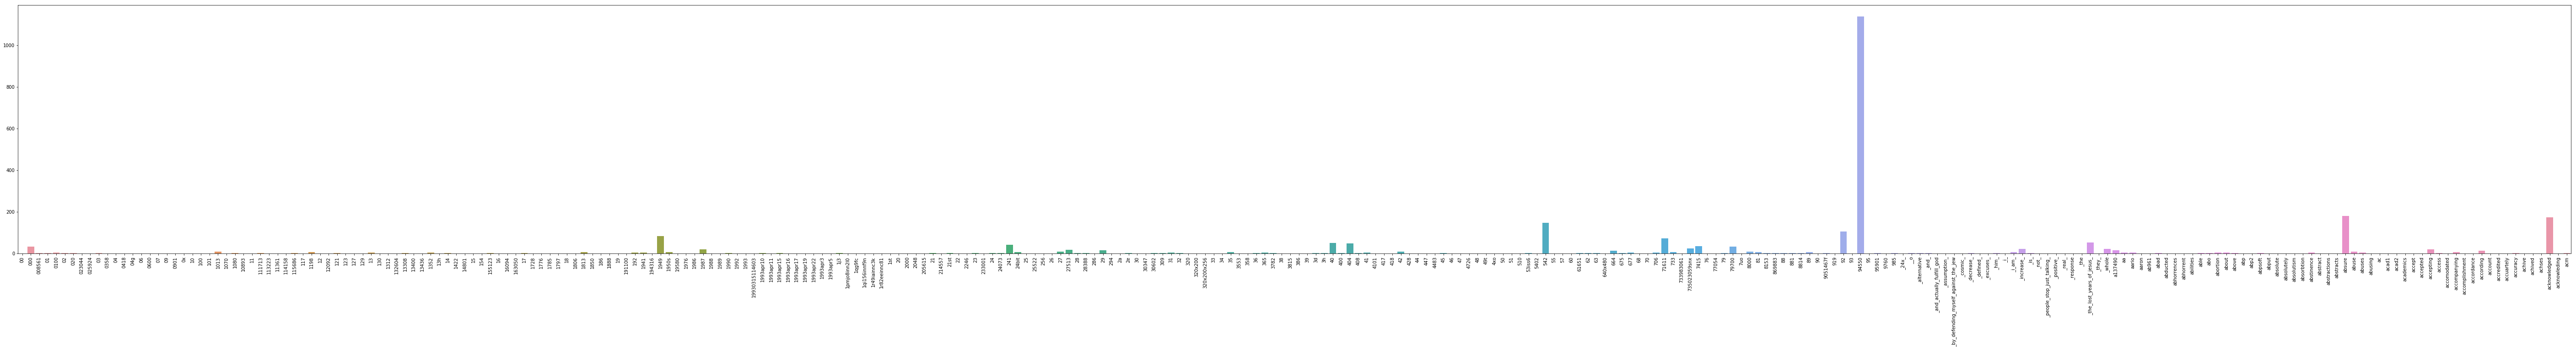

In [207]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies_n[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## Like the lab exercise, it shows the counts > 20

In [208]:
dataframe = pd.DataFrame({'terms': count_vect_n.get_feature_names()[0:3000], 'counts': term_frequencies[0:3000]})

## Sample 1,000 from main dataframe.
sample_dataframe = dataframe.sample(n = 1000, random_state = 42)

## Find the term frequency(counts) which large than 20.
final_dataframe = sample_dataframe[(sample_dataframe['counts'] > 20)][:]

x2 = final_dataframe['terms'].values.tolist()

y2 = final_dataframe['counts'].values.tolist()

need_print = [go.Bar(
            x = x2,
            y = y2   
            )]

py.offline.iplot(need_print, filename='New_dataset - counts20')


## Long tail

In [209]:
# Answer here

## I only show 0~1000 elements from sorted dataframe, if i don't do that, it will show
## "The draw time for this plot will be slow for clients without much RAM."

sorted = dataframe.sort_values(by = 'counts', ascending = False)

sorted_sample = sorted[0:400]

x = ["term_" + str(i) for i in sorted_sample['terms']]

y = sorted_sample['counts']


need_print = [go.Bar(
            x = x,
            y = y   
            )]

py.offline.iplot(need_print, filename='New_dataset - long tail')

In [210]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

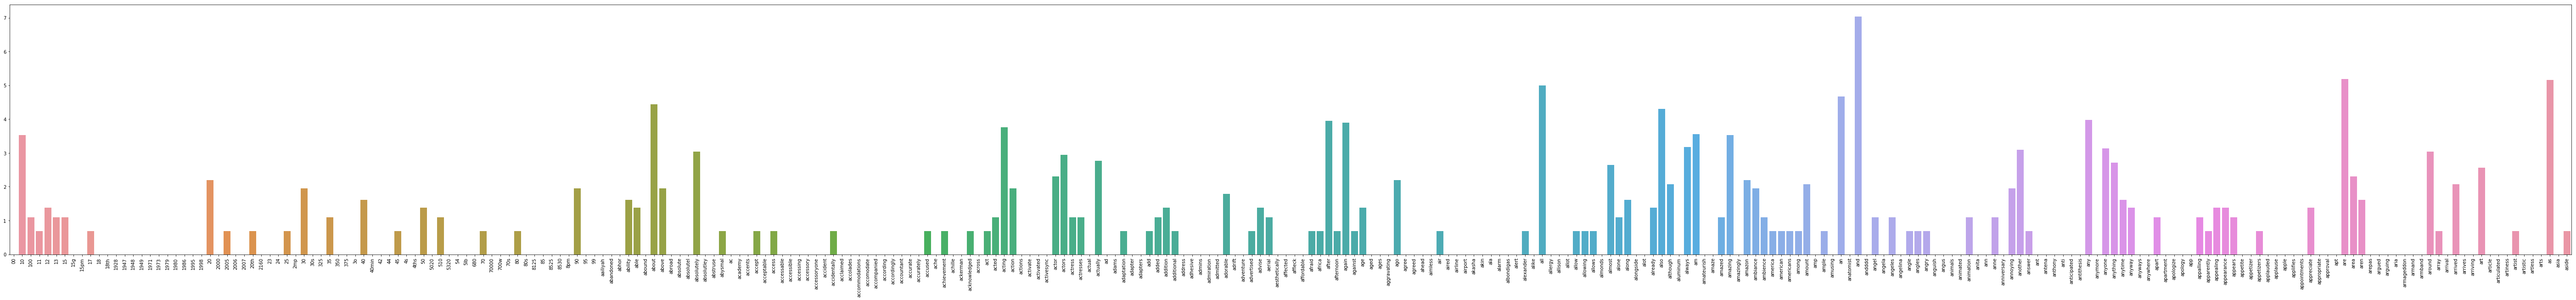

In [211]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_n.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect_n.get_feature_names()[:300], rotation = 90);

## Discretization and Binarization

In [212]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(new_dataset_df.score)
mlb.classes_
new_dataset_df['bin_score'] = mlb.transform(new_dataset_df['score']).tolist()
new_dataset_df[0:9]

# I think it's meaningless to binarize the "score" because it only has two values, 0 and 1.


,sentence,score,rating,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [213]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(new_dataset_df.rating)
mlb.classes_
new_dataset_df['bin_rating'] = mlb.transform(new_dataset_df['rating']).tolist()
new_dataset_df[0:9]

,sentence,score,rating,unigrams,bin_score,bin_rating
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1],[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0],[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],[0]


## New data visualizations (Bubble Chart)

In [214]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

sample_dataframe = dataframe.sample(n = 1000, random_state = 42)

final_dataframe = sample_dataframe[(sample_dataframe['counts'] > 20)][0:15]

x = final_dataframe ['terms'].values.tolist()

y = final_dataframe ['counts'].values.tolist()

trace0 = go.Scatter(
    x=x,
    y=y,
    mode='markers',marker=dict(
        size=[20,20,20,20,20,20,20,20,20,20,20,20,20,20,20],
    )
       
)

data = [trace0]
py.offline.iplot(data, filename='bubblechart')


## Generate TF-IDF features

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = new_dataset_df['sentence']

vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(corpus)

word = vectorizer.get_feature_names()

weight = X_tfidf.toarray()

print(vectorizer.idf_)

print(X_tfidf.shape)

print(X_counts_n.shape)

## TF-IDF matrix size is the same as the word frequency matrix

[8.21340005 5.57434272 7.52025287 ... 8.21340005 7.80793494 8.21340005]
(2714, 5153)
(500, 1758)


## Similarity between random sentences and report results

In [216]:
## Samplp 20 samples from news_data_set
similarity_data = new_dataset_df.sample(n = 20)

## Transformation to Word frequency vector & TF-IDF vector

## Word Frquency
wf_count_vect = CountVectorizer()
wf_counts = wf_count_vect.fit_transform(similarity_data.sentence)

## TF-IDF
tf_vectorizer = TfidfVectorizer()
tf_counts = tf_vectorizer.fit_transform(similarity_data.sentence)
## It uses three methods Euclidean distance, Manhattan distance, and Cosine similarity to show their similarity.

### 1.Euclidean distance

### -- Word frequency

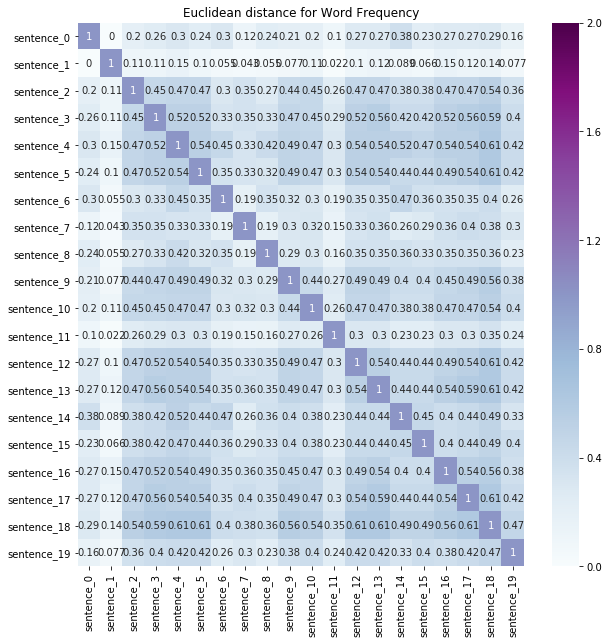

In [217]:
from sklearn.metrics.pairwise import euclidean_distances

ed = euclidean_distances(wf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Euclidean distance for Word Frequency')
ax = sns.heatmap(df_todraw,cmap = "BuPu", vmin = 0, vmax = 2, annot = True)

### -- TF-IDF


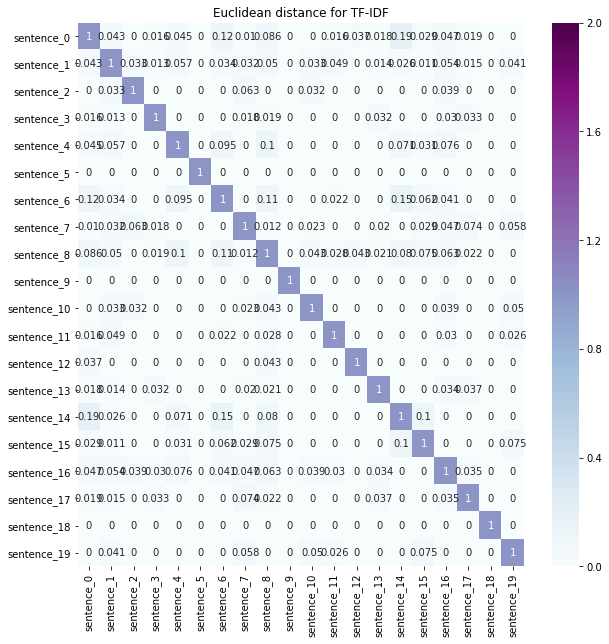

In [221]:
from sklearn.metrics.pairwise import euclidean_distances

edl = euclidean_distances(tf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = edl[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Euclidean distance for TF-IDF')
ax = sns.heatmap(df_todraw,cmap = "BuPu", vmin = 0, vmax = 2, annot = True)

### 2.Manhattan distance


### -- Word frequency

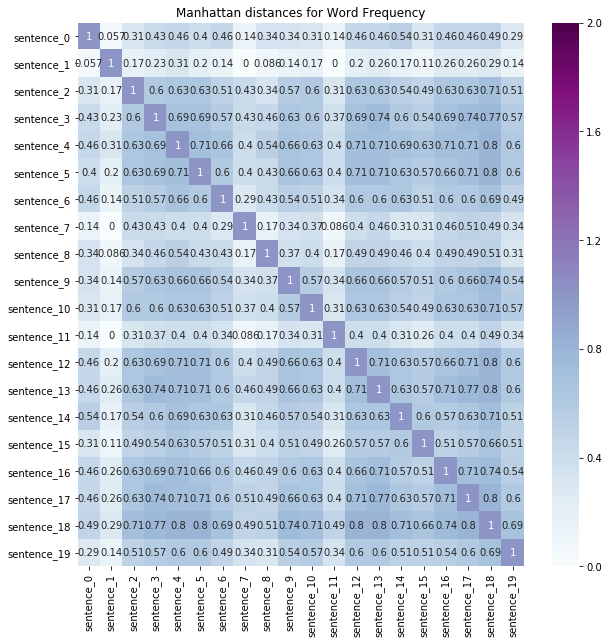

In [223]:
from sklearn.metrics.pairwise import manhattan_distances

ed2_1 = manhattan_distances(wf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed2_1[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Manhattan distances for Word Frequency')
ax = sns.heatmap(df_todraw,cmap = "BuPu", vmin = 0, vmax = 2, annot = True)

### -- TF-IDF

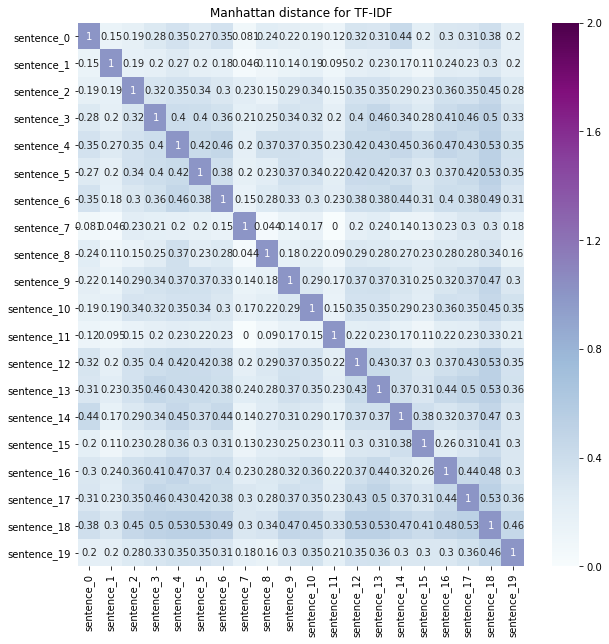

In [224]:
from sklearn.metrics.pairwise import manhattan_distances

ed2_2 = manhattan_distances(tf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed2_2[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Manhattan distance for TF-IDF')
ax = sns.heatmap(df_todraw,cmap = "BuPu", vmin = 0, vmax = 2, annot = True)

### 3.Cosine similarity


### -- Word frequency

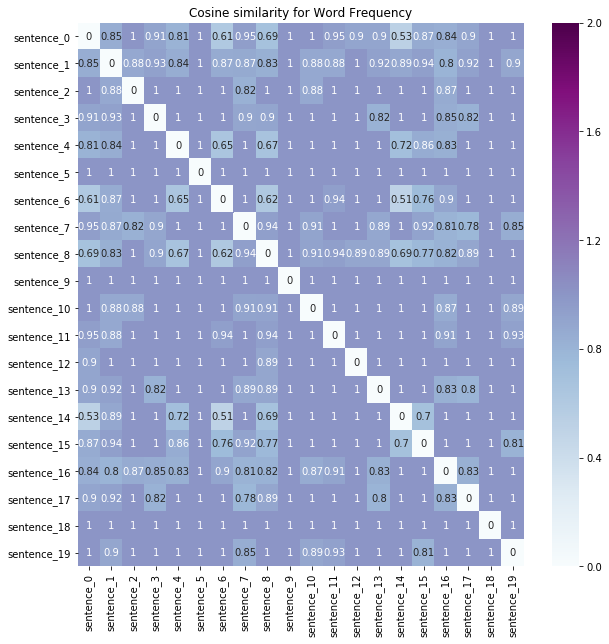

In [225]:
from sklearn.metrics.pairwise import cosine_similarity
ed3_1 = cosine_similarity(wf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed3_1[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Cosine similarity for Word Frequency')
ax = sns.heatmap(df_todraw,cmap = "BuPu", vmin = 0, vmax = 2, annot = True)

### -- TF-IDF

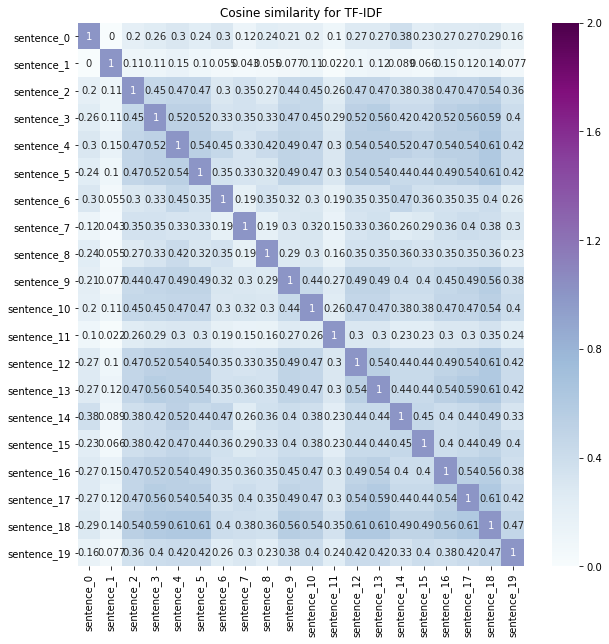

In [226]:
from sklearn.metrics.pairwise import cosine_similarity
ed3_2 = cosine_similarity(tf_counts)

## Plot
plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Cosine similarity for TF-IDF')
ax = sns.heatmap(df_todraw,cmap = "BuPu", vmin = 0, vmax = 2, annot = True)

# Naive Bayes classifier

## According to the reference site, the Multinomial naive Bayes may best fit in this data set.

## -- Word frequency

In [238]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#X_counts_normal = count_vect.fit_transform(list(new_dataset_df.sentence))

X = X_counts_normal.toarray()
Y = new_dataset_df['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

acc = cross_val_score(mnb, X_M, Y_M, scoring = 'accuracy', cv = 10).mean()
y_pred = mnb.predict(X_test)
print('Accuracy (Word Frequency): {:.3f}'.format(acc))


ModuleNotFoundError: No module named 'sklearn.cross_validation'

## -- TF-IDF

In [237]:
from sklearn.cross_validation import train_test_split
X = X_tfidf.toarray()
Y = new_dataset_df['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

acc = cross_val_score(mnb, X_M, Y_M, scoring = 'accuracy', cv = 10).mean()
y_pred = mnb.predict(X_test)
print('Accuracy (TF-IDF): {:.3f}'.format(acc))
print(classification_report(Y_test, y_pred))


ModuleNotFoundError: No module named 'sklearn.cross_validation'

## This the end of hw1.